In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

import os

In [55]:
import os
from time import sleep

output_parent_folder = r"data\extracted"

used_suffixes = ["_T1c_bias", "_T1_bias", "_DTI_eddy_MD", "_FLAIR_bias", "_DWI_bias", "_tumor_segmentation", "_brain_parenchyma_segmentation", "_brain_segmentation"]
used_image_suffix = used_suffixes[0]
used_label_suffix = used_suffixes[-3]
#used_label_suffix = used_suffixes[-2]

In [10]:
from IPython import display
import matplotlib as mpl

import gc
import psutil


c:\Users\standakozak\anaconda3\envs\radiomics\lib\site-packages\matplotlib\colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  c = np.array(c)


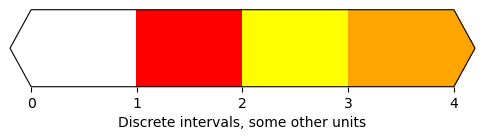

In [23]:
## segmentation_cmap

cmap = mpl.colors.ListedColormap([[0, 0, 0, 0],  "red", "yellow", "orange"])
bounds = [0, 1, 2, 3, 4]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots(figsize=(6, 1))
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax, orientation='horizontal',
    extend='both',
    spacing='proportional',
    label='Discrete intervals, some other units',
)

## Analyze the first picture

In [8]:
path = r"data\extracted\UCSF-PDGM-0009_nifti\UCSF-PDGM-0009_tumor_segmentation.nii"
#path = r"data\extracted\UCSF-PDGM-0009_nifti\UCSF-PDGM-0009_brain_segmentation.nii"

path = r"data\extracted\UCSF-PDGM-0009_nifti\UCSF-PDGM-0009_brain_parenchyma_segmentation.nii"
path = r"data\extracted\UCSF-PDGM-0009_nifti\UCSF-PDGM-0009_T1c_bias.nii"
img = nib.load(path).get_fdata()
img.shape

(240, 240, 155)

[ 76  75  77  74  78  73  79  80  81  72  82  83 102  71 101  84]


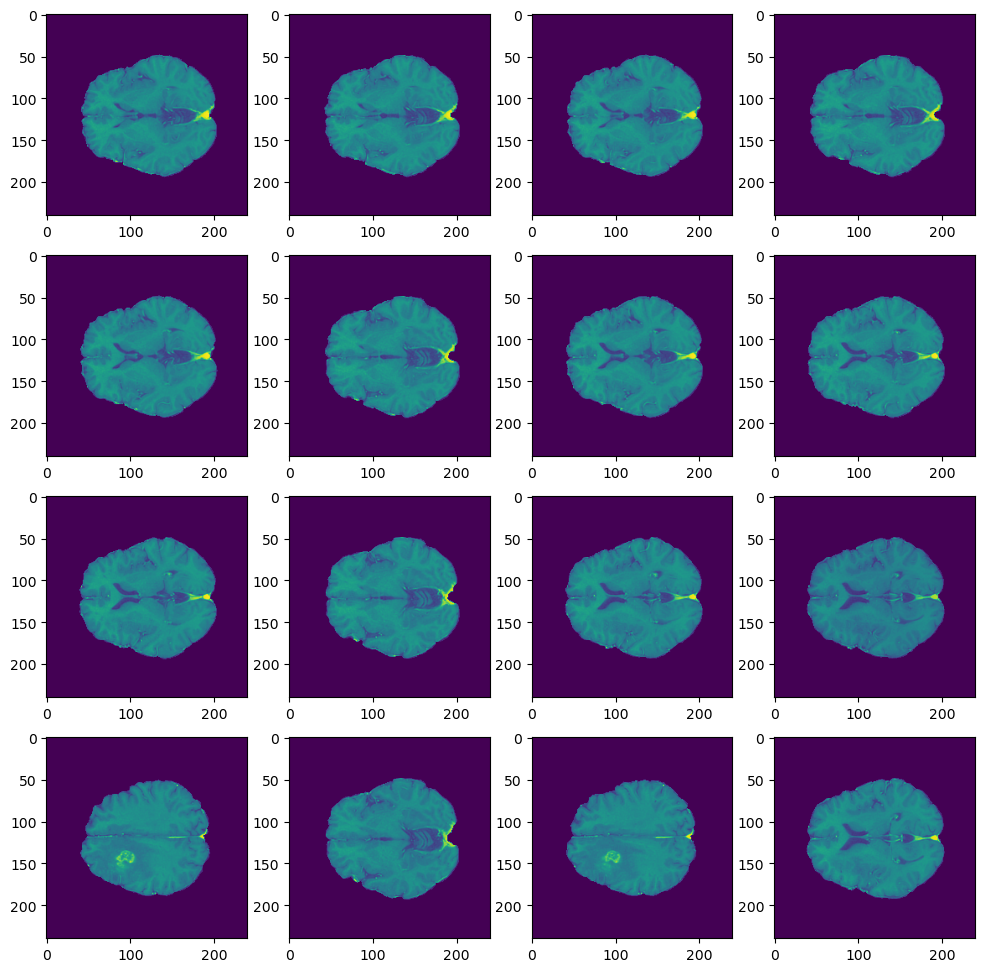

In [9]:
max_std_indices = np.argsort(img.reshape(-1, 155).std(axis=0))[::-1][:16]
print(max_std_indices)

plt.style.use('default')
fig, axes = plt.subplots(4,4, figsize=(12,12))
for img_index, ax in zip(max_std_indices, axes.reshape(-1)):
    ax.imshow(img[:,:,img_index])
plt.show()

In [64]:
def normalize(img):
    return (img - np.mean(img)) / np.std(img)

UCSF-PDGM-0009_nifti _DTI_eddy_MD


Text(0.5, 1.0, 'Unique values: [0. 2. 4.]')

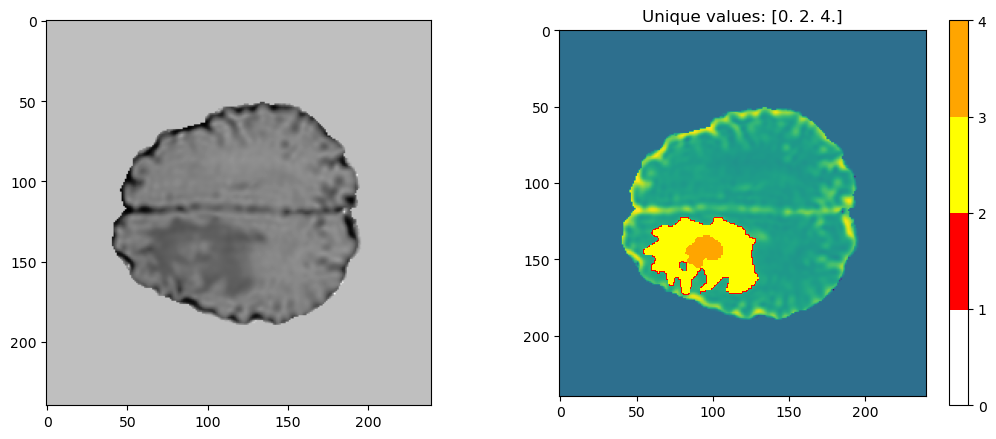

In [77]:
output_parent_folder = r"data\extracted"
extracted_image_folders = os.listdir(output_parent_folder)
extracted_image_folder = extracted_image_folders[0]
used_image_suffix = used_suffixes[2]
print(extracted_image_folder, used_image_suffix)

image_path = rf"{output_parent_folder}\{extracted_image_folder}\{extracted_image_folder.replace('_nifti', used_image_suffix)}.nii"
label_path = rf"{output_parent_folder}\{extracted_image_folder}\{extracted_image_folder.replace('_nifti', used_label_suffix)}.nii"

img = normalize(nib.load(image_path).get_fdata())
img_label = nib.load(label_path).get_fdata()

fig = plt.figure(figsize=(13, 5))

max_std_index = 101
selected_img = img[:,:, max_std_index]
selected_img_label = img_label[:,:, max_std_index]

ax = fig.add_subplot(121)
ax.imshow(selected_img, cmap="Greys")

ax2 = fig.add_subplot(122)

ax2.imshow(selected_img)
ax2.imshow(selected_img_label, cmap=cmap)

fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm))

ax2.set_title(f"Unique values: {np.unique(selected_img_label)}")

## Analyze all pictures

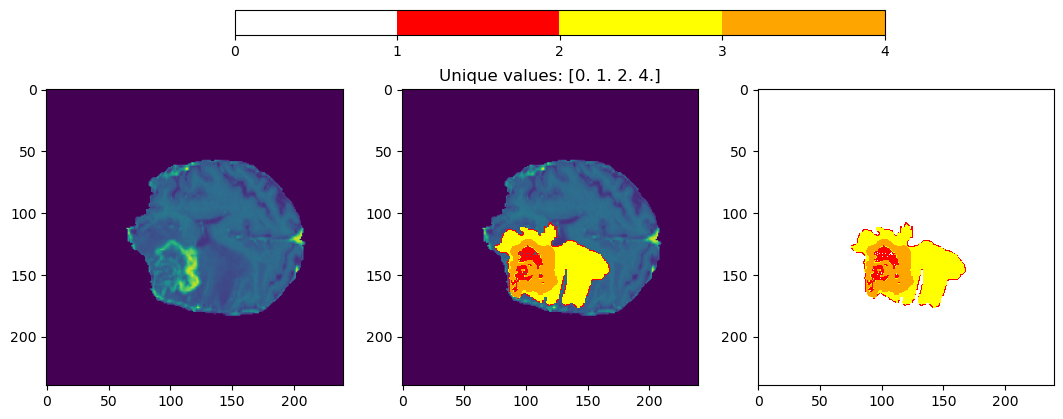

svmem(total=8462196736, available=540049408, percent=93.6, used=7922147328, free=540049408)
memory % used: 93.6


KeyboardInterrupt: 

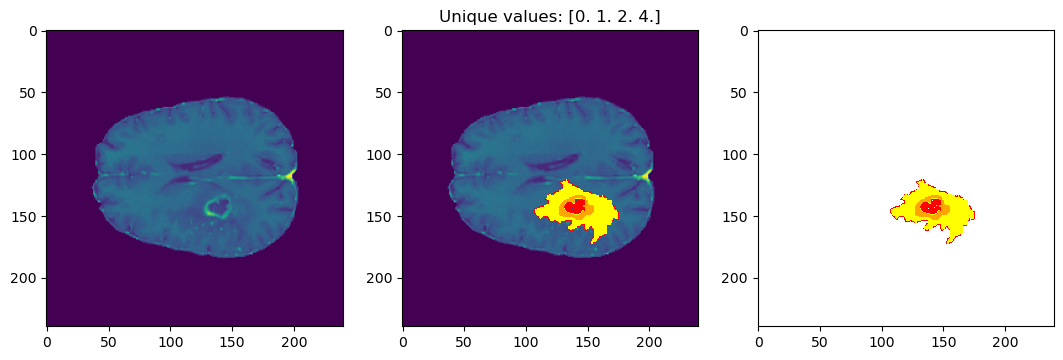

In [36]:
extracted_image_folders = os.listdir(output_parent_folder)

fig = plt.figure(figsize=(13, 5))
for i, extracted_image_folder in enumerate(extracted_image_folders):
    image_path = rf"{output_parent_folder}\{extracted_image_folder}\{extracted_image_folder.replace('_nifti', used_image_suffix)}.nii"
    label_path = rf"{output_parent_folder}\{extracted_image_folder}\{extracted_image_folder.replace('_nifti', used_label_suffix)}.nii"

    img = nib.load(image_path).get_fdata()
    img_label = nib.load(label_path).get_fdata()

    max_std_index = 106 #np.argsort(img.reshape(-1, 155).std(axis=0))[-1]

    selected_img = img[:,:, max_std_index]
    selected_img_label = img_label[:,:, max_std_index]
    #plt.clf()
    
    ax = fig.add_subplot(131)
    ax.imshow(selected_img)
    
    ax2 = fig.add_subplot(132)

    ax2.imshow(selected_img)
    ax2.imshow(selected_img_label, cmap=cmap)
    ax2.set_title(f"Unique values: {np.unique(selected_img_label)}")

    ax3 = fig.add_subplot(133)
    ax3.imshow(selected_img_label, cmap=cmap)

    cax = fig.add_axes([0.27, 0.9, 0.5, 0.05])

    fig.colorbar(mpl.cm.ScalarMappable(cmap=cmap, norm=norm), cax=cax, orientation='horizontal')

    
    display.clear_output(wait=True)
    
    display.display(fig) 
    #sleep(0.2)
    plt.clf()
    #plt.close(fig)
    #plt.cla()
    gc.collect()
    if i % 2 == 0:
        
        #plt.close('all')
        
        gc.collect()

    print(psutil.virtual_memory())  # physical memory usage
    print('memory % used:', psutil.virtual_memory()[2])